In [1]:
# Second report on Zebra Patterns
###
# Take spotsize 25 um
# Jsat = 0.00000015 uJ/um^2
# Einput = pi * 25^2 * Jsat * 10
###

from beam import *

In [2]:
# TODO list:
# (1): Plot 2*ΔΕ/Ein versus offset for thickness of ablation vals 0,5,10,...,40 um
# (2): Plot min(2*ΔΕ/Εin) versus thickness of ablation
# (3): Plot effective Jsat, (eJsat = Esat/(pi*25^2) vs thickness of ablation, Esat := E-val s.t. ΔΕ/Ε = initEfrac/2)
# For (3), linear absorption coefficient is zeroed out

In [3]:
# Data synthesis code for (1) and (2) is as follows:

results = []  # results list will contain energy integral values(wrt offset 1um per step) of each thickness of ablation value
Einput = np.pi*(25**2)*0.00000015*10  # Einput will be 10-fold of [Jsat*Area]
ee = beam_initialize(res=33, threshold=10**-10, w=25, Ep=Einput)  # Resolution: about 30nm for unit length
Ein = integrate_for_energy(ee)
ablation_thicknesses = [i for i in range(0,45,5)]
for i in ablation_thicknesses:
    mm = mask_initialize(beam=ee, shape='lines',width=5,thickness=i,crop=False)
    itrtr = mask_slide_iterator(beam=ee,mask=mm,stepsY=(i+5))  # Slider slides graphene layer 1um at a time
    tmp = []
    for j in itrtr:
        k = integrate_for_energy(j[1])
        tmp.append(k)
        del(j)
    results.append(tmp)
    del(mm)
    del(itrtr)

In [4]:
# Saving the synthesized data:

fp = open("zebra2.txt",'w')
fp.write("Zebra patterns 2; ablation thickness vals 0 through 40 by 5; width 5; sliding results:\n")
for i in results:
    fp.write(str(i))
    fp.write('\n')
fp.close()

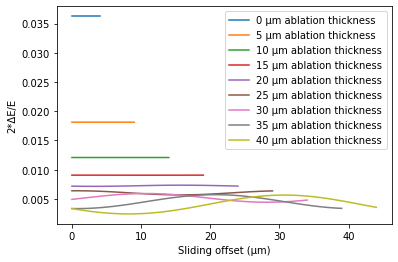

In [5]:
# Plotting code for (1)

dE_E = []
for i in range(9):
    dE_E.append([(2*(Ein - j)/Ein) for j in results[i]])
for i in range(9):
    plt.plot(dE_E[i], label=f"{str(ablation_thicknesses[i])} μm ablation thickness")
plt.ylabel('2*ΔE/E')
plt.xlabel('Sliding offset (μm)')
# Note that for every graphene pattern, there are 5um between ablated regions
plt.legend(loc = 'best')
plt.show()

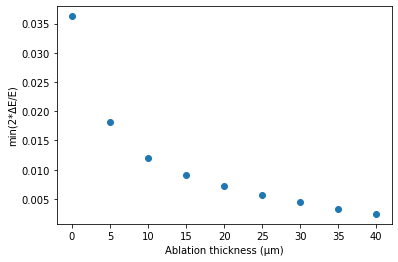

min(2*ΔE/E) values for ablation thicknesses 0,5,10,...,40 um are as follows: 

 [0.03624900601888213, 0.018124187397258372, 0.012082738996141798, 0.00905743841893446, 0.007150351805009744, 0.005691118878326927, 0.004433562136385177, 0.003342964239088222, 0.00243321212247457]


In [33]:
# Plotting code for (2)

dE_E_min = [min(i) for i in dE_E]
plt.plot(ablation_thicknesses, dE_E_min,'o')
plt.ylabel(r'min(2*ΔE/E)')
plt.xlabel('Ablation thickness (μm)')
plt.show()
print(f"min(2*ΔE/E) values for ablation thicknesses 0,5,10,...,40 um are as follows: \n\n {dE_E_min}")

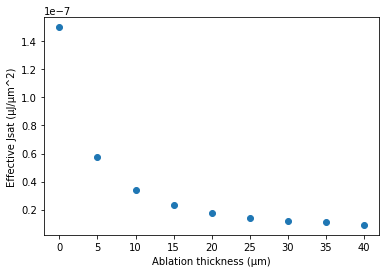

Effective Jsat values (uJ/um^2) are as follows for ablation thicknesses of 0,5,10,...,40 um:

[1.50000000e-07 5.74736449e-08 3.39259722e-08 2.34742604e-08
 1.74410240e-08 1.40761144e-08 1.22360805e-08 1.15293337e-08
 9.10586108e-09]


In [34]:
# For (3), the given equation and definition of Esat does not seem promising after a few trials with data attained in the first report, the predefined Jsat of 0.00000015 μJ/μm^2 could not be retrived with any sane error bounds for the graphene layer with zero ablation, and the equation seems to be not constraining enough, what is the initial E value to use in the equation? Arbitrary initial E ends up with an arbitrary effective Jsat value.
# We could make use of an alternative approach, if we would like to find the approximate Jsat value of a nonablated graphene layer that absorbs about the same amount of energy due to saturable absorption that the ablated one does. We can fit a polynomial equation of aftermath energy attained by predefined masks of no ablation and known Jsat, with a0 coefficient taken as 0, and then use the equation to find effective Jsat of a graphene layer.
# We will use the zero offset configuration for effective Jsat approximation for each ablation thickness value, we cannot use the data attained for (1) as the graphene layers used there were not set to be a0=0 so we have to synthesize new data, zero offset seems to be enough to have an idea.

from scipy.interpolate import interp1d


Einput = np.pi*(25**2)*0.00000015*10  # Einput will be 10-fold of [Jsat*Area]
ee = beam_initialize(res=33, threshold=10**-10, w=25, Ep=Einput)  # Resolution: about 30nm for unit length
Eafter = []  # Data points for the list of Jsat values defined below
Js_vals = [i/1000000000 for i in range(1,155,5)]  # Boundary was determined by hand

results_3 = []
for i in ablation_thicknesses:
    mm = mask_initialize(beam=ee, shape='lines',width=5,thickness=i,a0=0)
    results_3.append(integrate_for_energy(mask_apply(ee,mm)))

for Js in Js_vals:
    mm = mask_initialize(beam=ee, a0=0, Js=Js, shape='lines', width=10, thickness=0)  # Non-ablated graphene layer with a0=0
    Eafter.append(integrate_for_energy(mask_apply(ee,mm)))

f = interp1d(Eafter, Js_vals, kind=7)  # f is an interpolating function, splines method with deg=7 (7: arbitrary choice), can take Eafter as parameter, returns corresponding effective Jsat value
plt.plot(ablation_thicknesses,f(results_3),'o')
plt.ylabel('Effective Jsat (μJ/μm^2)')
plt.xlabel('Ablation thickness (μm)')
plt.show()
print(f"Effective Jsat values (uJ/um^2) are as follows for ablation thicknesses of 0,5,10,...,40 um:\n\n{f(results_3)}")

In [35]:
# Author: Onur Serin
# beam.py is available on https://github.com/serinos/miscellaneous/blob/master/physlabstuff/beam.py